In [2]:
import pandas as pd

# Read in the data
df = pd.read_csv('./eda_logs.csv')
df.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
0,FedAvg,2,jax,False,1.0,cpu_utilization_fit,86.3,2023-12-01 20:25:51,1
1,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.6,2023-12-01 20:26:48,1
2,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:28:58,2
3,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.9,2023-12-01 20:30:13,2
4,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:32:31,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strategy      2888 non-null   object 
 1   n_clients     2888 non-null   int64  
 2   backend       2888 non-null   object 
 3   client_bool   2888 non-null   bool   
 4   client_num    1640 non-null   float64
 5   metric        2888 non-null   object 
 6   metric_value  2888 non-null   float64
 7   timestamp     2120 non-null   object 
 8   round         2888 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 183.4+ KB


In [4]:
#time to see the accuracies
df.metric.unique()

array(['cpu_utilization_fit', 'cpu_utilization_evaluate',
       'fit_progress_loss', 'fit_progress_accuracy', 'losses_distributed',
       'losses_centralized', 'metrics_centralized'], dtype=object)

In [5]:
strategies = [ "FedAvg", "FedAdam", "FedAvgM","FedAdaGrad"]
n_clients = df['n_clients'].unique()
backends = df['backend'].unique()
metrics = df['metric'].unique()

# ['FedAdaGrad' 'FedAvg' 'FedAdam' 'FedAvgM']
# [5 2]
# ['jax' 'tensorflow' 'torch']
# ['cpu_utilization_fit' 'cpu_utilization_evaluate']
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(strategies)
print(n_clients)
print(backends)
print(metrics)

rounds = df['round'].unique()
print(rounds)



['FedAvg', 'FedAdam', 'FedAvgM', 'FedAdaGrad']
[2 5]
['jax' 'tensorflow' 'torch']
['cpu_utilization_fit' 'cpu_utilization_evaluate' 'fit_progress_loss'
 'fit_progress_accuracy' 'losses_distributed' 'losses_centralized'
 'metrics_centralized']
[ 1  2  3  4  5  6  7  8  9 10  0]


In [6]:
#first grahp is seeing the cpu usage over time so we will keep rows that str.contains cpu_utilization in the metric column
df_cpu_util = df[df['metric'].str.contains('cpu_utilization')]
df_cpu_util.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
0,FedAvg,2,jax,False,1.0,cpu_utilization_fit,86.3,2023-12-01 20:25:51,1
1,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.6,2023-12-01 20:26:48,1
2,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:28:58,2
3,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.9,2023-12-01 20:30:13,2
4,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:32:31,3


In [7]:
df_cpu_util.metric.unique()

array(['cpu_utilization_fit', 'cpu_utilization_evaluate'], dtype=object)

In [23]:
# import matplotlib.pyplot as plt
# # Iterate over each strategy, number of clients, and metric
# for strategy in strategies:
#     for client in n_clients:
#         for metric in df_cpu_util.metric.unique():
#             plt.figure(figsize=(10, 6)) 
#             plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: {metric}')
#             plt.xlabel('Round')
#             plt.ylabel('Average CPU Utilization')

#             # Plot for each backend
#             for backend in backends:
#                 # Filter and group the DataFrame for the specific combination
#                 subset = df_cpu_util[(df_cpu_util['strategy'] == strategy) & 
#                                      (df_cpu_util['n_clients'] == client) & 
#                                      (df_cpu_util['backend'] == backend) & 
#                                      (df_cpu_util['metric'] == metric)]
                
#                 # print(subset)

#                 # Group by round and calculate the mean
#                 mean_values = subset.groupby('round')['metric_value'].mean()

#                 # Check if there are enough rounds, if not, skip
#                 if mean_values.index.max() < max(rounds):
#                     continue

#                 plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

#             plt.legend()
#             plt.show()


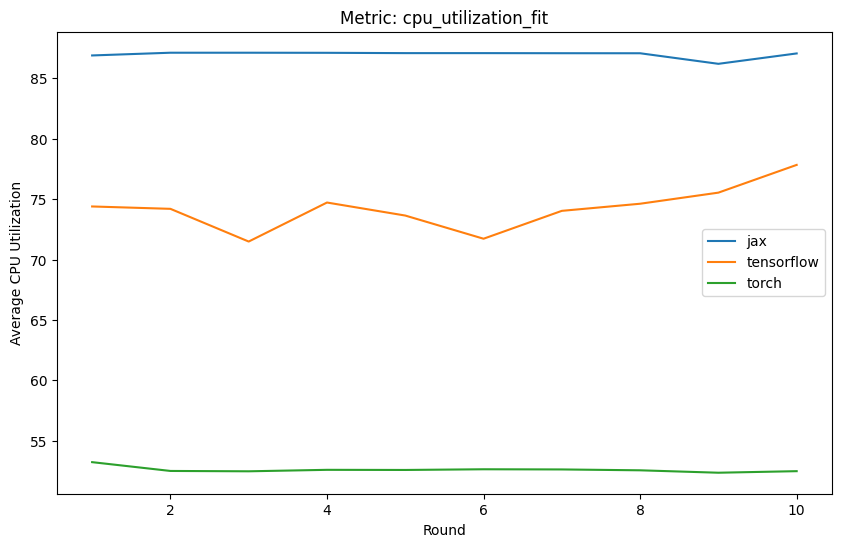

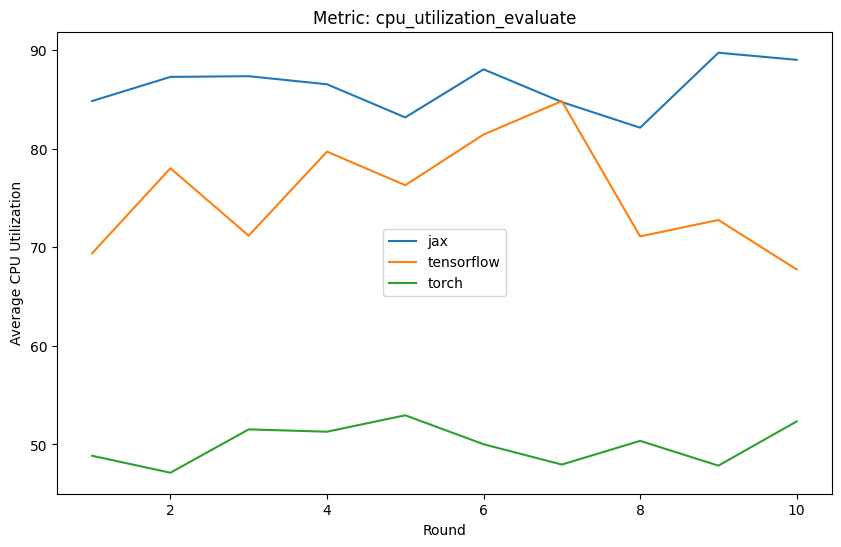

In [26]:
import matplotlib.pyplot as plt

# Iterate over each metric
for metric in metrics:
    plt.figure(figsize=(10, 6)) 
    plt.title(f'Metric: {metric}')
    plt.xlabel('Round')
    plt.ylabel('Average CPU Utilization')

    # Plot for each backend
    for backend in backends:
        # Filter and group the DataFrame for the specific backend and metric
        subset = df_cpu_util[(df_cpu_util['backend'] == backend) & 
                             (df_cpu_util['metric'] == metric)]
        
        # Group by round and calculate the mean
        mean_values = subset.groupby('round')['metric_value'].mean()

        # Check if there are enough rounds, if not, skip
        if mean_values.index.max() < max(rounds):
            continue

        plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

    plt.legend()
    plt.show()


In [10]:
df_fit_progress = df[df['metric'].str.contains('fit_progress')]
df_fit_progress.head()


,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
40,FedAvg,2,jax,True,NaN,fit_progress_loss,1.215640,290.209763746,1
41,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.387500,290.209763746,1
42,FedAvg,2,jax,True,NaN,fit_progress_loss,0.824771,495.28245861100004,2
43,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.515278,495.28245861100004,2
44,FedAvg,2,jax,True,NaN,fit_progress_loss,0.608002,688.885122693,3


In [12]:
acc = df_fit_progress[df_fit_progress['metric'].str.contains('fit_progress_accuracy')]
acc['round'] = acc['round'].apply(lambda x: abs(11-x))
acc.head()

/tmp/ipykernel_86019/705814082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc['round'] = acc['round'].apply(lambda x: abs(11-x))


,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
41,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.387500,290.209763746,10
43,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.515278,495.28245861100004,9
45,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.593750,688.885122693,8
47,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.640833,901.763935505,7
49,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.675000,1105.6422122640001,6


In [27]:
# for strategy in strategies:
#     for client in n_clients:
#         plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#         plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: fit_progress_acc')
#         plt.xlabel('Round')
#         plt.ylabel('Average acc')

#         # Plot for each backend
#         for backend in backends:
#             # Filter and group the DataFrame for the specific combination
#             subset = acc[(acc['strategy'] == strategy) & 
#                             (acc['n_clients'] == client) & 
#                             (acc['backend'] == backend)]
            
#             # Group by round and calculate the mean
#             mean_values = subset.groupby('round')['metric_value'].mean()

#             # Check if there are enough rounds, if not, skip
#             if mean_values.index.max() < max(rounds):
#                 continue

#             plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

#         plt.legend()
#         plt.show()

In [14]:
#we need to  figure out the timing of the logs
df[df.client_bool == True].head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
40,FedAvg,2,jax,True,NaN,fit_progress_loss,1.215640,290.209763746,1
41,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.387500,290.209763746,1
42,FedAvg,2,jax,True,NaN,fit_progress_loss,0.824771,495.28245861100004,2
43,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.515278,495.28245861100004,2
44,FedAvg,2,jax,True,NaN,fit_progress_loss,0.608002,688.885122693,3


In [15]:
losses = df_fit_progress[df_fit_progress['metric'].str.contains('fit_progress_loss')]
losses.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
40,FedAvg,2,jax,True,NaN,fit_progress_loss,1.215640,290.209763746,1
42,FedAvg,2,jax,True,NaN,fit_progress_loss,0.824771,495.28245861100004,2
44,FedAvg,2,jax,True,NaN,fit_progress_loss,0.608002,688.885122693,3
46,FedAvg,2,jax,True,NaN,fit_progress_loss,0.595175,901.763935505,4
48,FedAvg,2,jax,True,NaN,fit_progress_loss,0.614394,1105.6422122640001,5


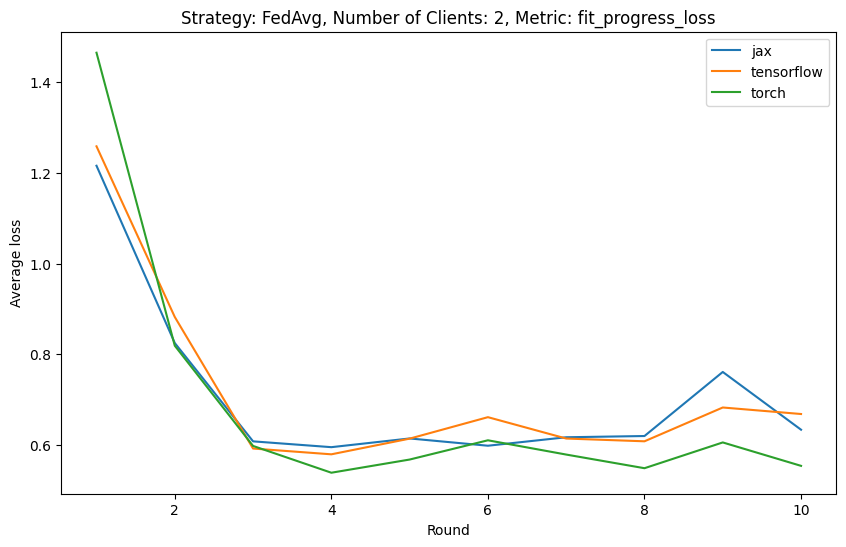

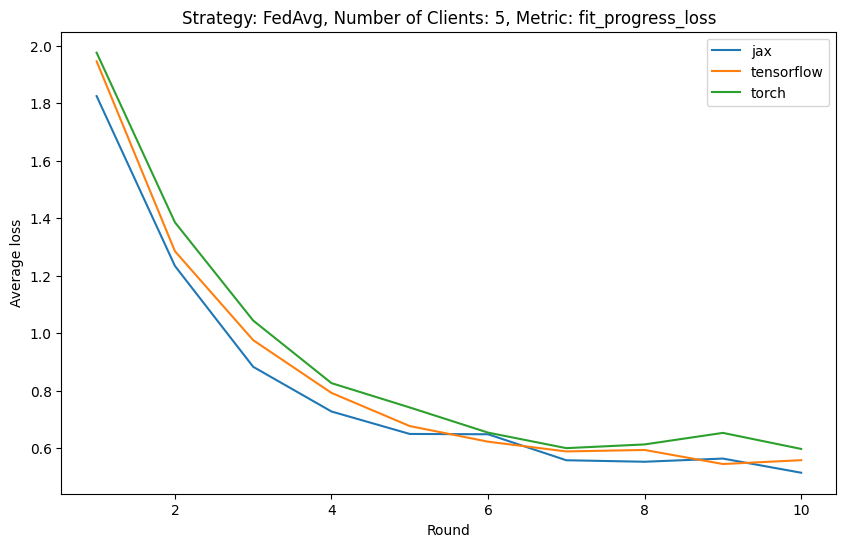

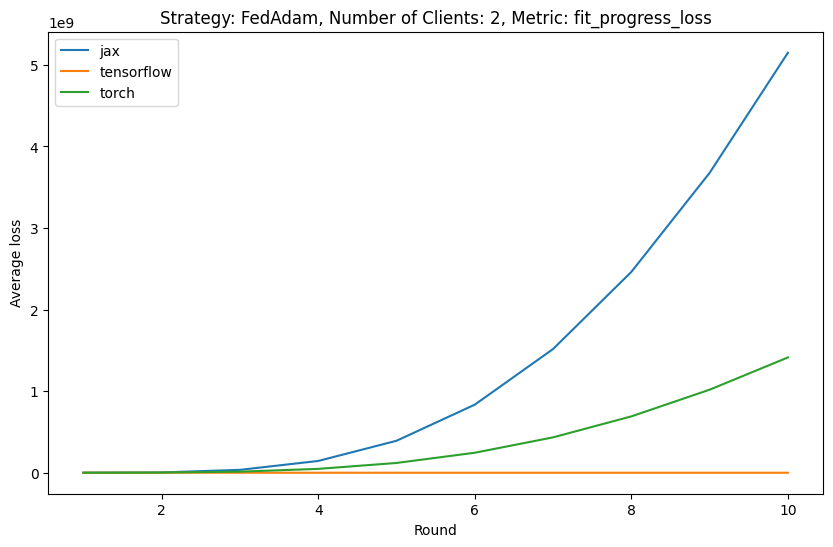

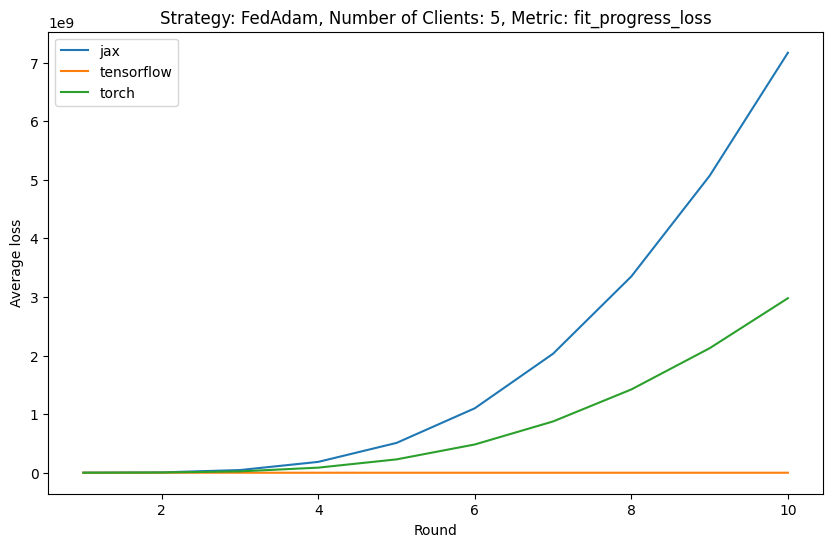

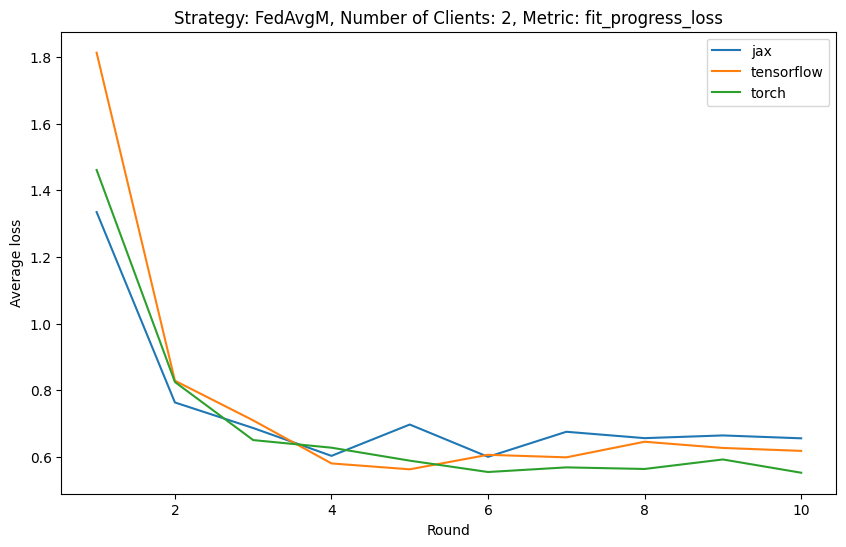

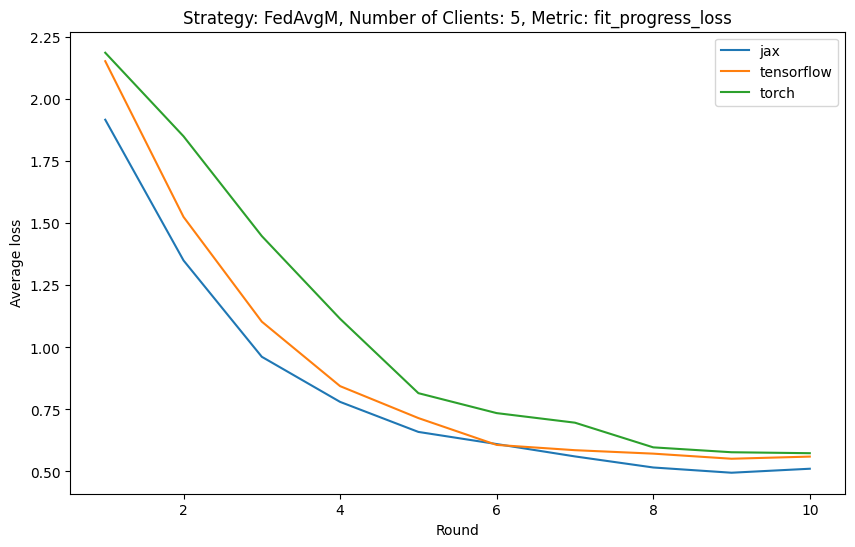

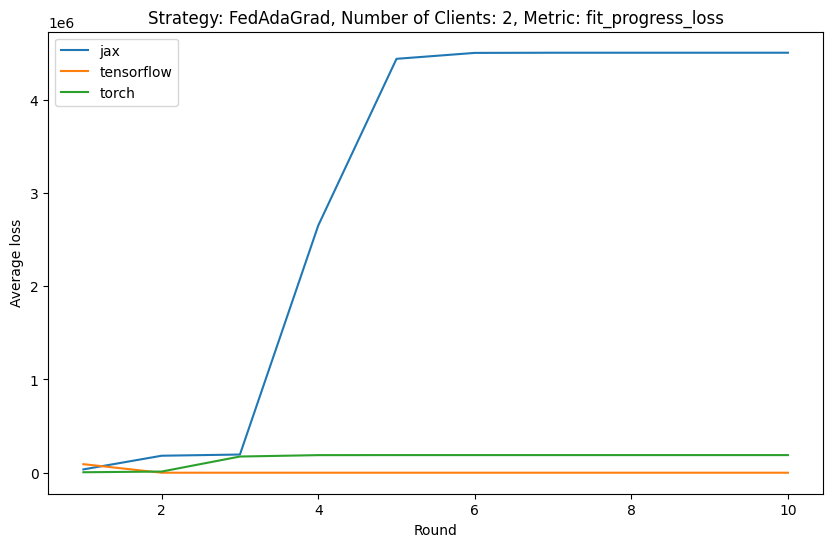

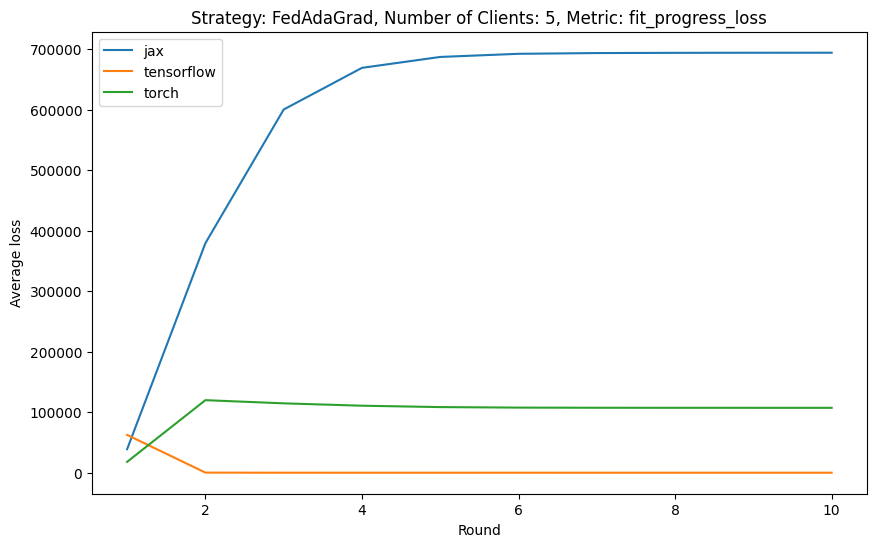

In [16]:
for strategy in strategies:
    for client in n_clients:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: fit_progress_loss')
        plt.xlabel('Round')
        plt.ylabel('Average loss')

        # Plot for each backend
        for backend in backends:
            # Filter and group the DataFrame for the specific combination
            subset = losses[(losses['strategy'] == strategy) & 
                            (losses['n_clients'] == client) & 
                            (losses['backend'] == backend)]
            
            # Group by round and calculate the mean
            mean_values = subset.groupby('round')['metric_value'].mean()

            # Check if there are enough rounds, if not, skip
            if mean_values.index.max() < max(rounds):
                continue

            plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

        plt.legend()
        plt.show()

In [17]:
#Now we need to use the accuracy rows but instead calculate the differnect from the timestamps to see how long it took to get to that accuracy
df_for_time = df[df['metric'].str.contains('fit_progress_accuracy')]
df_for_time = df_for_time[['strategy', 'n_clients', 'backend', 'round', 'timestamp']]
#make round int so we can sort
df_for_time.sort_values(by=['strategy', 'n_clients', 'backend','round'], inplace=True)
df_for_time.head()

,strategy,n_clients,backend,round,timestamp
753,FedAdaGrad,2,jax,1,153.11870680599986
755,FedAdaGrad,2,jax,2,346.9702283589995
757,FedAdaGrad,2,jax,3,558.847636128
759,FedAdaGrad,2,jax,4,771.9164603769996
761,FedAdaGrad,2,jax,5,966.9292190269998


In [18]:
df_for_time['round'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
#convert timestamp to float
df_for_time['timestamp'] = df_for_time['timestamp'].astype(float)

df_for_time['time_diff'] = df_for_time.sort_values(by=['strategy', 'n_clients', 'backend', 'round']).groupby(['strategy', 'n_clients', 'backend'])['timestamp'].diff()
df_for_time['time_diff'].fillna(0, inplace=True)
df_for_time

,strategy,n_clients,backend,round,timestamp,time_diff
753,FedAdaGrad,2,jax,1,153.118707,0.000000
755,FedAdaGrad,2,jax,2,346.970228,193.851522
757,FedAdaGrad,2,jax,3,558.847636,211.877408
759,FedAdaGrad,2,jax,4,771.916460,213.068824
761,FedAdaGrad,2,jax,5,966.929219,195.012759
...,...,...,...,...,...,...
2583,FedAvgM,5,torch,6,436.746959,79.863940
2585,FedAvgM,5,torch,7,526.011074,89.264115
2587,FedAvgM,5,torch,8,587.024809,61.013735
2589,FedAvgM,5,torch,9,648.584593,61.559784


In [20]:
#convert the time_diff to minutes and seconds
import time
df_for_time['time_diff_formatted'] = df_for_time['time_diff'].apply(lambda x: time.strftime('%M:%S', time.gmtime(x)))
df_for_time.head()

,strategy,n_clients,backend,round,timestamp,time_diff,time_diff_formatted
753,FedAdaGrad,2,jax,1,153.118707,0.000000,00:00
755,FedAdaGrad,2,jax,2,346.970228,193.851522,03:13
757,FedAdaGrad,2,jax,3,558.847636,211.877408,03:31
759,FedAdaGrad,2,jax,4,771.916460,213.068824,03:33
761,FedAdaGrad,2,jax,5,966.929219,195.012759,03:15


In [28]:
# for strategy in strategies:
#     for client in n_clients:
#         plt.figure(figsize=(10, 6))  
#         plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: time_diff')
#         plt.xlabel('Round')
#         plt.ylabel('Average time_diff')

#         # Plot for each backend
#         for backend in backends:
#             # Filter and group the DataFrame for the specific combination
#             subset = df_for_time[(df_for_time['strategy'] == strategy) & 
#                             (df_for_time['n_clients'] == client) & 
#                             (df_for_time['backend'] == backend)]
            
#             # Group by round and calculate the mean
#             mean_values = subset.groupby('round')['time_diff'].mean()

#             # Check if there are enough rounds, if not, skip
#             if mean_values.index.max() < max(rounds):
#                 continue

#             plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

#         plt.legend()
#         plt.show()

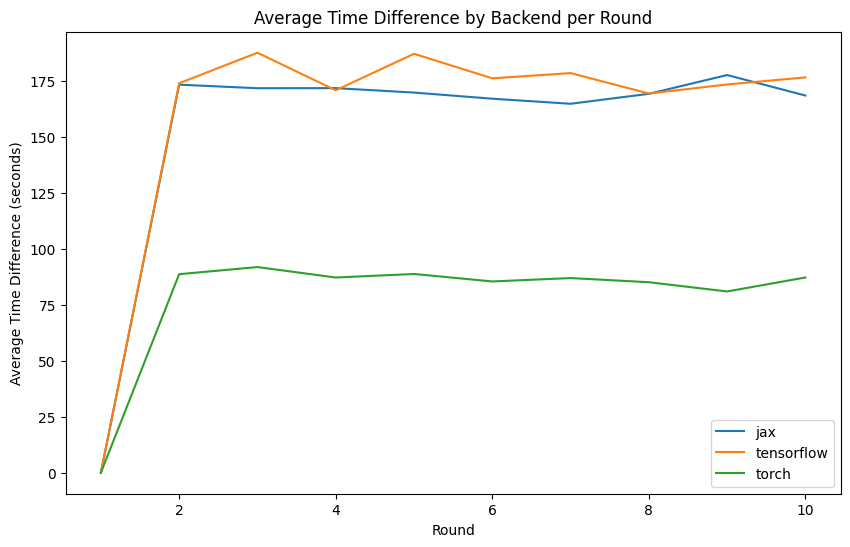

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  
plt.title('Average Time Difference by Backend per Round')
plt.xlabel('Round')
plt.ylabel('Average Time Difference (seconds)')

# Plot for each backend
for backend in backends:
    # Filter and group the DataFrame for the specific backend
    subset = df_for_time[df_for_time['backend'] == backend]
    
    # Group by round and calculate the mean
    mean_values = subset.groupby('round')['time_diff'].mean()

    # Check if there are enough rounds, if not, skip
    if mean_values.index.max() < max(rounds):
        continue

    plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

plt.legend()
plt.show()
